<img src='https://github.com/Deci-AI/data-gradients/blob/master/src/data_gradients/assets/images/logo.png?raw=true'>


## 👋🏽 What's up! It's [Harpreet](https://twitter.com/DataScienceHarp)

Welcome to this tutorial notebook on [DataGradients](https://github.com/Deci-AI/data-gradients) for **object detection datasets**. DG is an open-source Python library for computer vision dataset analysis. If you're looking for the **segmentation datasets** notebook, you can find that [here.](https://bit.ly/dg-starter-notebook-seg)

I'll be guiding you through this notebook. At any point, if you get stuck or have questions, feel free to [read the docs](https://bit.ly/dg-docs) or get in touch:

1) Send me an email with your issue: harpreet.sahota@deci.ai

2) Hop into the [Deep Learning Daily (powered by Deci) Discord server](https://discord.gg/p9ecgRhDR8), and let me know what your question is.

3) [Open an issue on GitHub](https://github.com/Deci-AI/data-gradients/issues/new)

Let's get to it...


# Introduction

Whether you're working on image classification, object detection, or [semantic segmentation](https://bit.ly/dg-starter-notebook-seg), DataGradients helps you gain insights and analyze your datasets effectively.

In this tutorial, you'll explore the features and functionalities of DataGradients, guiding you through comprehensive data analysis for computer vision projects.

With DataGradients, you can:

- Analyze image features such as color distribution, brightness, and size.
- Profile object detection datasets with metrics like bounding box area, intersection, and class frequency.
- Understand segmentation datasets using object area, width, height, and class frequency.
- Visualize samples for a better understanding.
- And [much more](https://github.com/Deci-AI/data-gradients/blob/master/documentation/feature_description.md)

Profiling your datasets has never been easier!

## 👨🏽‍🔧 Step 0: Installation

Note: after installation is complete you will need to restart this notebook. Do the following: `Runtime -> Restart runtime`.

Be careful NOT to select `Disconnect and delete runtime`.



In [ ]:
%%capture
# data-gradients
!pip install -U -q git+https://github.com/Deci-AI/data-gradients.git
# !pip install data-gradients

# to get data from roboflow
# !pip install roboflow
!pip install datasets[vision]

# for displaying pdfs as images in notebook
!pip install pdf2image
!apt-get install poppler-utils

# for pretty printing json
!pip install Pygments

# 🛠️ Utility functions

The `display_pdf_pages` function is a utility that displays each page of a PDF file as images in separate output cells.

Given the path to a PDF file, it converts the PDF into a list of PIL Images using `pdf2image`.

It then iterates through the list and displays each image using `IPython.display`.

This function is useful for visually examining PDF content, such as reviewing pages or checking layouts.

In [ ]:
from PIL import Image
from pdf2image import convert_from_path
from IPython.display import display

def display_pdf_pages(pdf_path):
    """
    Display each page of a PDF file as images in separate output cells.

    Args:
        pdf_path (str): The path to the PDF file.

    Raises:
        FileNotFoundError: If the specified PDF file is not found.

    Returns:
        None
    """
    try:
        # Convert PDF to a list of PIL Images
        images = convert_from_path(pdf_path)

        # Display each image
        for i, image in enumerate(images):
            # Display the image
            display(image)

    except FileNotFoundError:
        raise FileNotFoundError("The specified PDF file was not found.")

The `print_pretty_json` function opens a JSON file, formats the data with an indent of 4 spaces using `json.dumps`, applies syntax highlighting with `Pygments`, and prints the pretty-printed JSON data in the cell below.

In [ ]:
import json
from pygments import highlight, lexers, formatters
from pathlib import Path

def print_pretty_json(file_path):
    """
    Function to pretty print a JSON file with colorization.

    Args:
        file_path (Union[str, Path]): The path of the JSON file to be pretty-printed.

    Raises:
        FileNotFoundError: If the file at `file_path` doesn't exist.
        json.JSONDecodeError: If the file at `file_path` is not valid JSON.
    """
    try:
        # Open the file
        with open(file_path, 'r') as f:
            # Load the JSON data from the file
            data = json.load(f)
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found: {file_path}")
    except json.JSONDecodeError:
        raise json.JSONDecodeError("Invalid JSON file", "", 0)

    # Pretty print the JSON data with an indent of 4 spaces
    formatted_json = json.dumps(data, indent=4)

    # Colorize the pretty-printed JSON data
    colorful_json = highlight(formatted_json,
                              lexers.JsonLexer(),
                              formatters.TerminalFormatter()
                              )

    # Print the colorized, pretty-printed JSON data
    print(colorful_json)


## ⤵️ Step 1: Download Dataset

We are going to use [hugging face datasets](https://huggingface.co/docs/datasets/index) and a [dataset](https://huggingface.co/datasets/Francesco/halo-infinite-angel-videogame) that I hosted there from rf100

In [ ]:
from datasets import load_dataset

train_dataset = load_dataset("Francesco/halo-infinite-angel-videogame", split="train")
valid_dataset = load_dataset("Francesco/halo-infinite-angel-videogame", split="validation")

train_dataset[0]

/Users/francescozuppichini/Documents/data-gradients/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Extracting data files: 100%|████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1054.38it/s]


Dataset parquet downloaded and prepared to /Users/francescozuppichini/.cache/huggingface/datasets/Francesco___parquet/Francesco--halo-infinite-angel-videogame-20dd16a336c46c12/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


Found cached dataset parquet (/Users/francescozuppichini/.cache/huggingface/datasets/Francesco___parquet/Francesco--halo-infinite-angel-videogame-20dd16a336c46c12/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


{'image_id': 311,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x640>,
 'width': 640,
 'height': 640,
 'objects': {'id': [573, 574],
  'area': [1748, 15756],
  'bbox': [[248.0, 228.0, 38.0, 46.0], [232.0, 228.0, 78.0, 202.0]],
  'category': [2, 1]}}

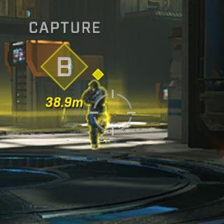

In [ ]:
train_dataset[0]['image'].resize((224,224))

## 📊 Step 2: Perform Analysis

Now that you have your dataset loaded and ready, its time to profile it using DataGradients.

In this section, you'll use the `DetectionAnalysisManager` class from DataGradients to analyze your dataset. This will trigger feature extraction, visualization, and an interpretation processes provided by DataGradients.

**The time it takes to analyze your dataset depends on its size. If your dataset is large, it may take 20 minutes or more.**

You instantiate the `DetectionAnalysisManager` with the following arguments:

- `report_title`: A title for the analysis report.

- `train_data` and `val_data`: The dataloaders for the training and validation sets, respectively.

- `class_names`: The list of class names present in the dataset.


**🔘 There are optional parameters that you can adjust as needed**:

- `class_names_to_use`: The subset of class names we want to analyze if you're interested in only certain classes.

- `images_extractor` and `labels_extractor`: Custom functions to extract images and labels from the dataset if needed.

- `threshold_soft_labels`: A threshold value for soft labels, converting them to hard labels.

- `batches_early_stop`: The number of batches to analyze before early stopping.

You can find more information about these parameters in the [`DetectionAnalysisManager` class documentation](https://github.com/Deci-AI/data-gradients/blob/master/src/data_gradients/managers/detection_manager.py).

Once we have instantiated the `DetectionAnalysisManager`, you can run the analysis by calling the `run()` method.

### You'll be prompted for information about your annotations:

- Are your annotations labels-first or labels-last?

- What format are your annotations in?

INFO:data_gradients.utils.summary_writer:`log_dir` was not set, so the logs will be saved in /Users/francescozuppichini/Documents/data-gradients/logs/Test_with_Adapters
INFO:data_gradients.config.data.data_config:Cache deactivated for `DetectionDataConfig`. Please set `load_cache=True` if you want to activate it.


  - Executing analysis with: 
  - batches_early_stop: None 
  - len(train_data): 462 
  - len(val_data): 462 
  - log directory: /Users/francescozuppichini/Documents/data-gradients/logs/Test_with_Adapters 
  - Archive directory: /Users/francescozuppichini/Documents/data-gradients/logs/Test_with_Adapters/archive_20230712-092815 
  - feature extractor list: {'Image Features': [SummaryStats, ImagesResolution, ImageColorDistribution, ImagesAverageBrightness], 'Object Detection Features': [DetectionSampleVisualization, DetectionClassHeatmap, DetectionBoundingBoxArea, DetectionBoundingBoxPerImageCount, DetectionBoundingBoxSize, DetectionClassFrequency, DetectionClassesPerImageCount, DetectionBoundingBoxIoU]}


Analyzing... :   0%|                                                                                        | 0/462 [00:00<?, ?it/s]


------------------------------------------------------------------------
Which comes first in your annotations, the class id or the bounding box?
------------------------------------------------------------------------
Here's a sample of how your labels look like:
Each line corresponds to a bounding box.
tensor([[  1., 248., 228.,  38.,  46.],
        [  0., 232., 228.,  78., 202.]])

Options:
[0] | Label comes first (e.g. [class_id, x1, y1, x2, y2])
[1] | Bounding box comes first (e.g. [x1, y1, x2, y2, class_id])

Your selection (Enter the corresponding number) >>> 0
Great! You chose: Label comes first (e.g. [class_id, x1, y1, x2, y2])


------------------------------------------------------------------------
What is the bounding box format?
------------------------------------------------------------------------
Here's a sample of how your labels look like:
Each line corresponds to a bounding box.
tensor([[  1., 248., 228.,  38.,  46.],
        [  0., 232., 228.,  78., 202.]])

Opti

Analyzing... :   1%|▋                                                                               | 4/462 [00:05<07:40,  1.01s/it]

Great! You chose: xywh: x-left, y-top, width, height			(COCO format)



Summarizing... : 100%|████████████████████████████████████████████████████████████████████████████████| 2/2 [00:09<00:00,  4.52s/it]


Dataset successfully analyzed!
Starting to write the report, this may take around 10 seconds...
****************************************************************************************************
We have finished evaluating your dataset!

The cache of your DataConfig object can be found in:
    - /Users/francescozuppichini/Library/Caches/DataGradients/Test_with_Adapters.json

The results can be seen in:
    - /Users/francescozuppichini/Documents/data-gradients/logs/Test_with_Adapters
    - /Users/francescozuppichini/Documents/data-gradients/logs/Test_with_Adapters/archive_20230712-092815


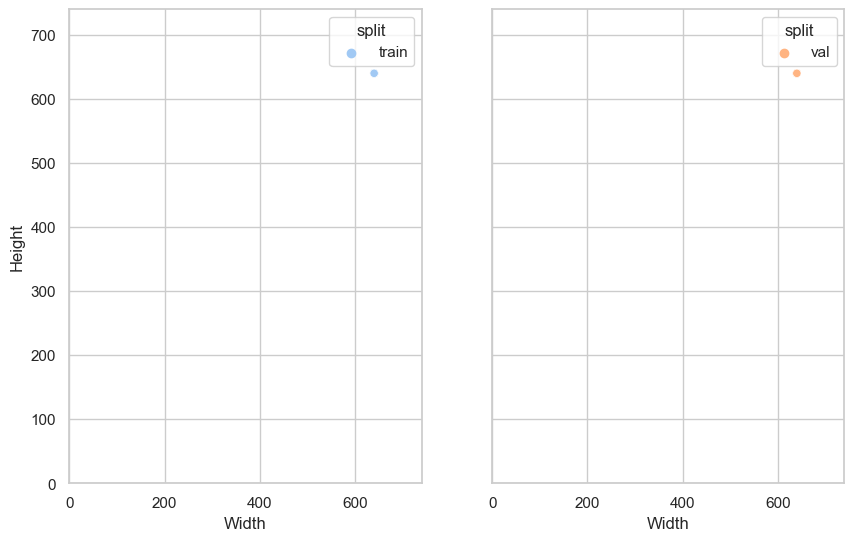

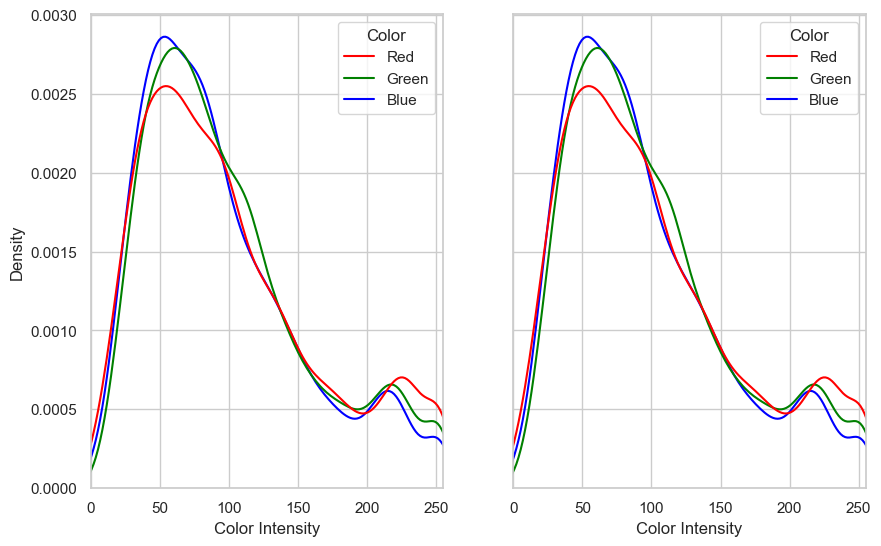

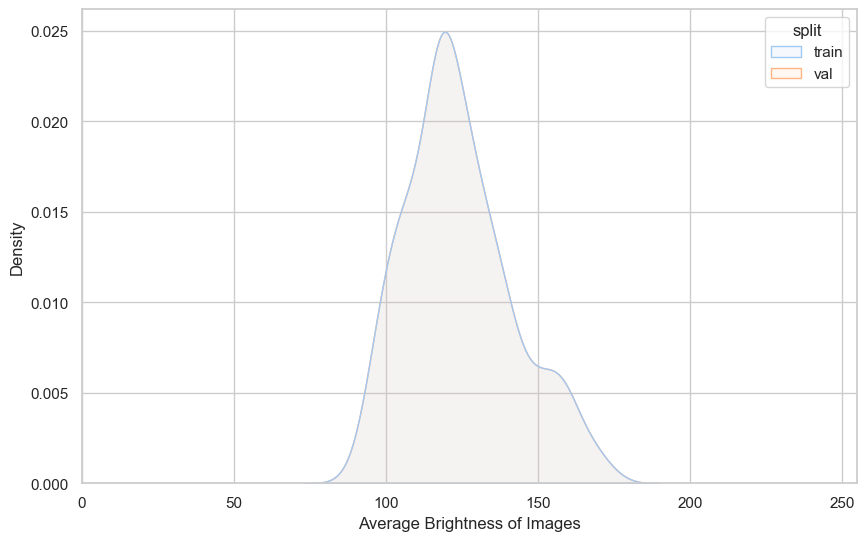

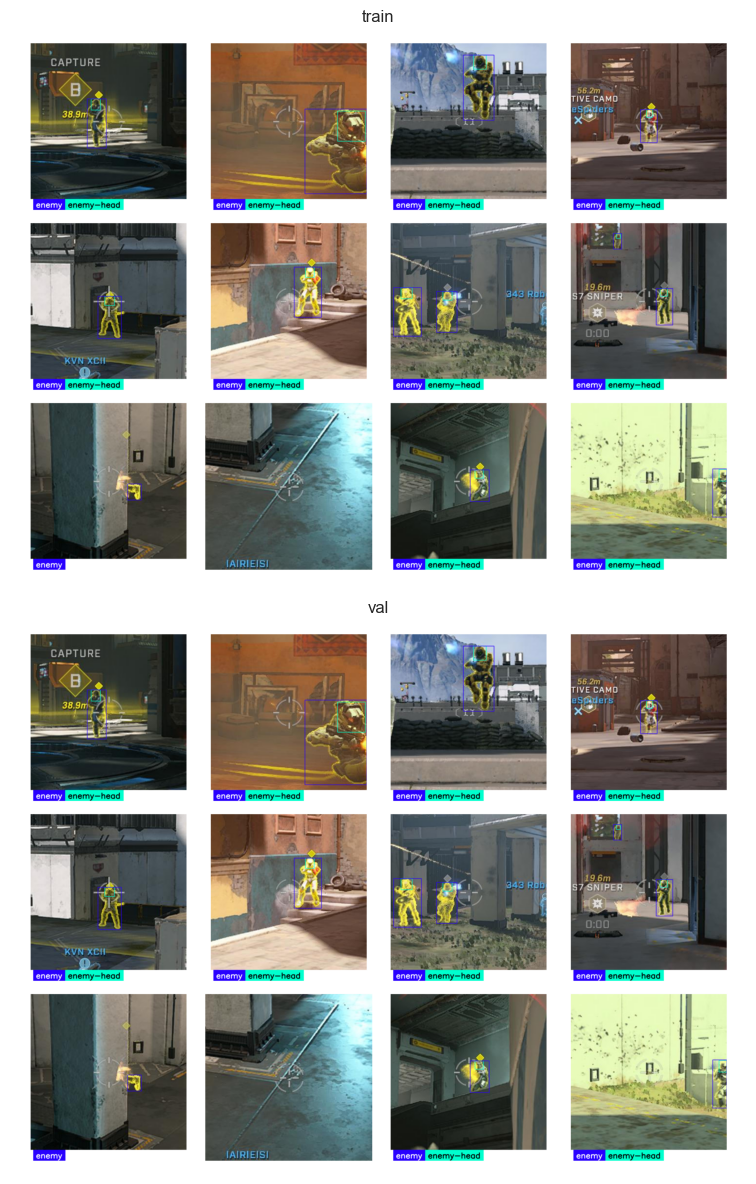

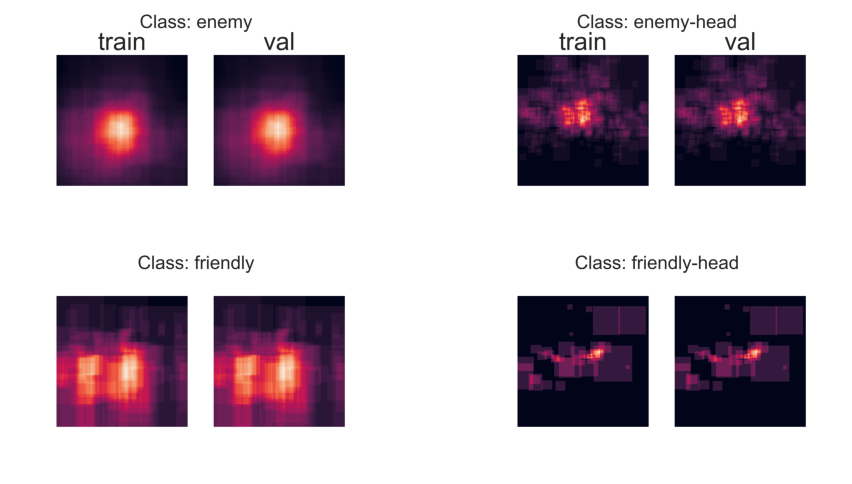

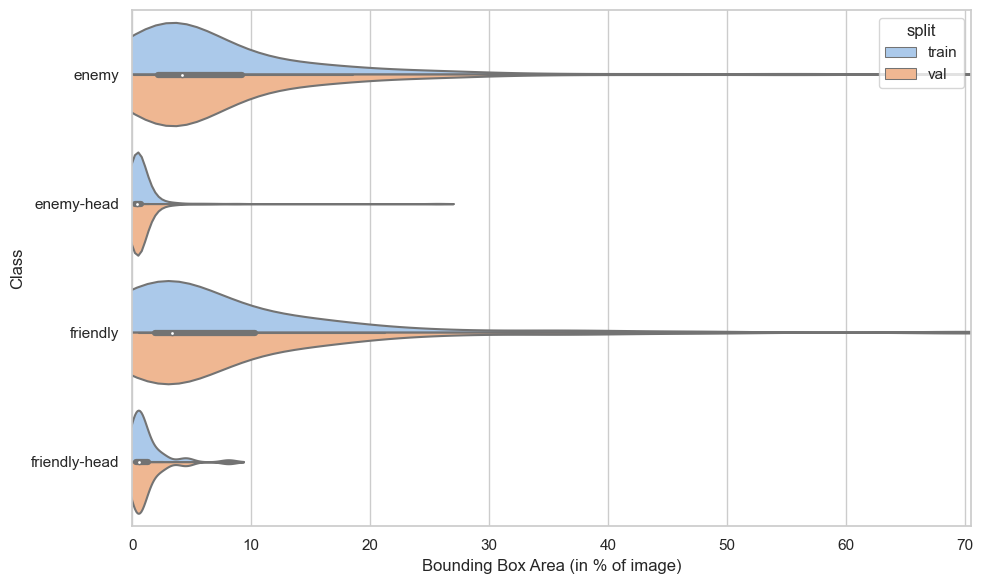

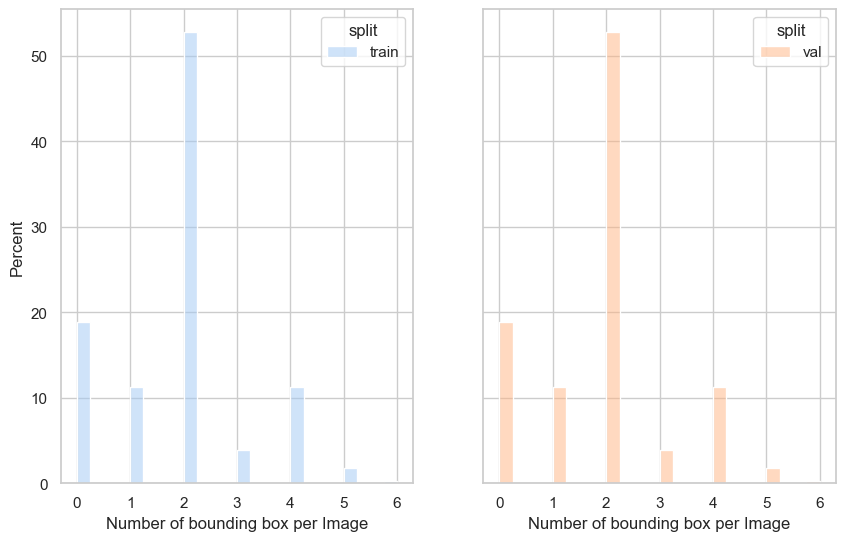

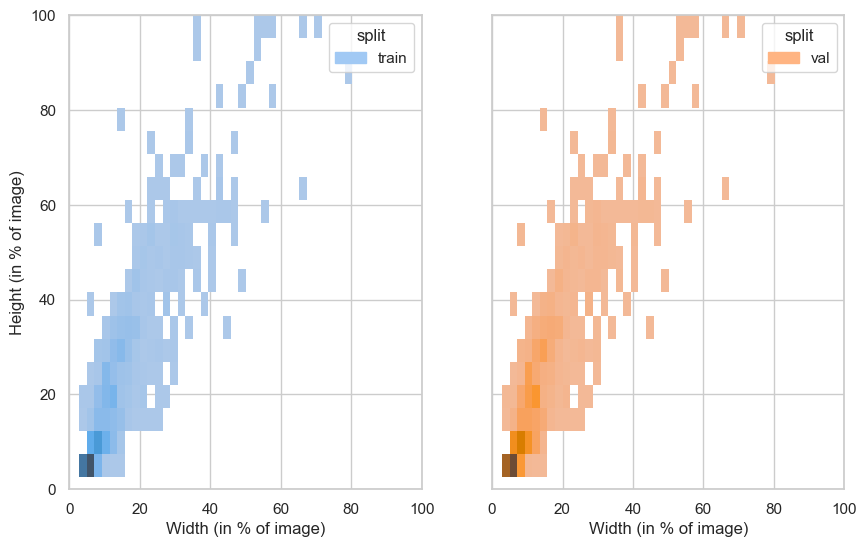

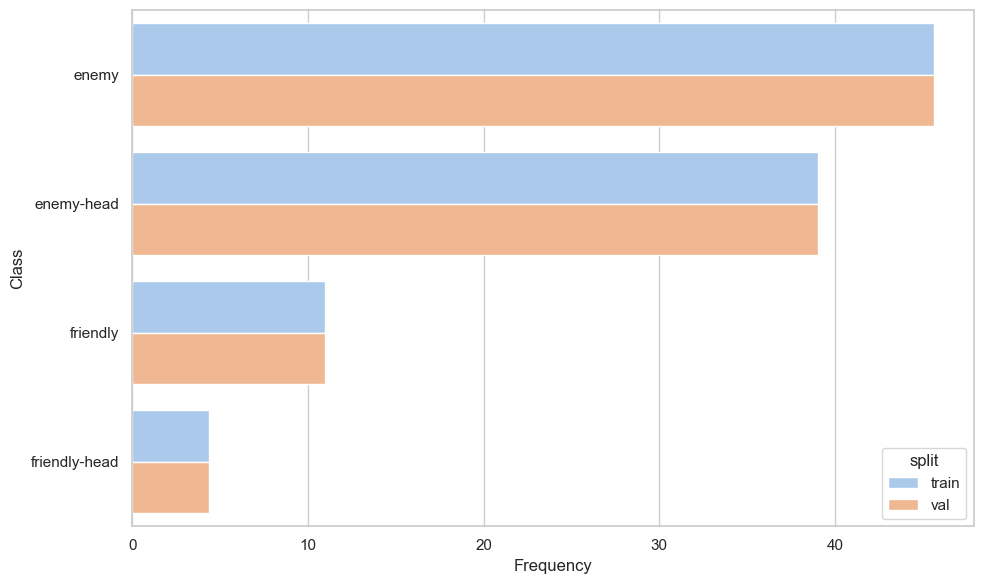

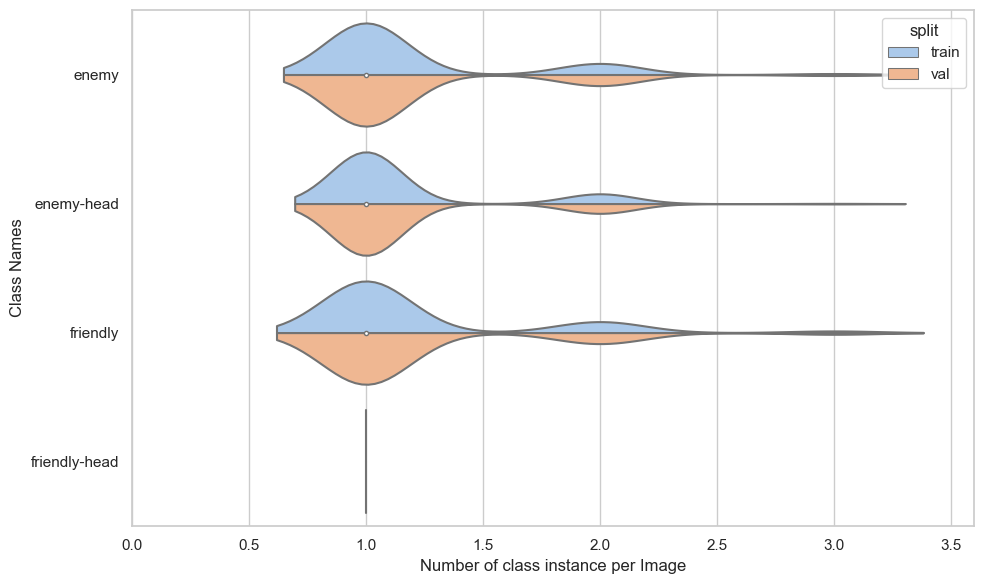

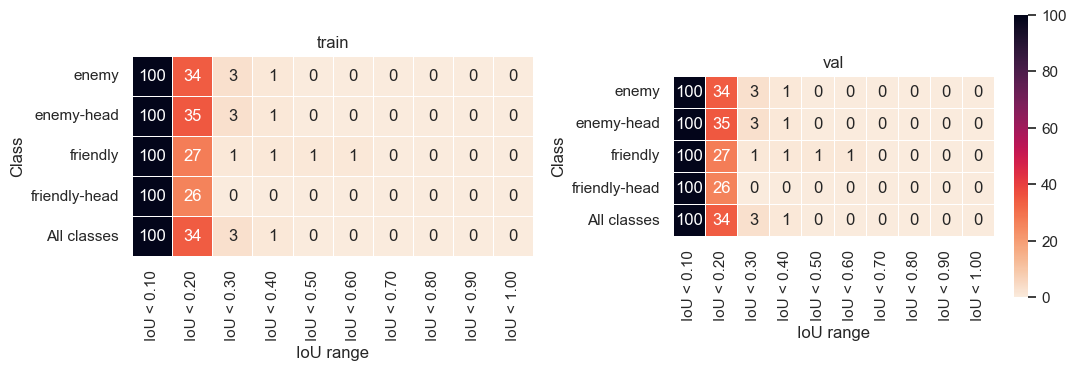

In [ ]:
from data_gradients.managers.detection_manager import DetectionAnalysisManager
from torchvision.transforms.functional import to_tensor
import torch
# see doc https://docs.deci.ai/data-gradients/index.html#dataset-adapters
images_extractor = lambda data: to_tensor(data['image'])
def labels_extractor(data):
    objects = data['objects']
    res = []
    for bbox, category in zip(objects["bbox"], objects["category"]):
        # -1 because we start from 1
        res.append([category - 1, *bbox])
    return torch.tensor(res)

class_names = ["enemy", "enemy-head", "friendly", "friendly-head"]

analyzer = DetectionAnalysisManager(
    report_title="Test with Adapters",
    train_data=train_dataset,
    val_data=train_dataset,
    images_extractor=images_extractor,
    labels_extractor=labels_extractor,
    class_names=class_names
)

analyzer.run()

## Step 4: View Full PDF Report

When you created the `analyzer`, you passed a value for `report_title`.

The report will be saved to a folder in your current working directory that corresponds to that value.

If you want to save it in a different folder, you can pass the path to `log_dir` in the `DetectionAnalysisManager` constructor.

Inside the log directory, you will find a complete PDF report that summarizes and provides insights on feature extractors.

In our case **logs/Test_with_Adapters/Report.pdf**

# 🔚 You've made it to the end!

If you think DataGradients is useful, head over to GitHub and [⭐️ the repo](https://github.com/Deci-AI/data-gradients).


### Some datasets you might want to try on your own:
 - [HuggingFace competition: Ship detection](https://huggingface.co/spaces/competitions/ship-detection)

- [Aquarium dataset on RoboFlow](https://public.roboflow.com/object-detection/aquarium)

- [Vehicles-OpenImages Dataset on RoboFlow](https://public.roboflow.com/object-detection/vehicles-openimages)

- [Winegrape detection](https://github.com/thsant/wgisd)

- [Low light object detection](https://github.com/cs-chan/Exclusively-Dark-Image-Dataset)

- [Infrafred person detection](https://camel.ece.gatech.edu/)

- [Pothole detection](https://www.kaggle.com/datasets/chitholian/annotated-potholes-dataset)

- [100k Labeled Road Images | Day, Night](https://www.kaggle.com/datasets/solesensei/solesensei_bdd100k)

- [Deep Fashion dataset](https://github.com/switchablenorms/DeepFashion2)

- [Playing card detection](https://www.kaggle.com/datasets/luantm/playing-card)

- [Anaomoly detection in videos](https://www.crcv.ucf.edu/projects/real-world/)

- [Underwater fish recognition](https://www.kaggle.com/datasets/aalborguniversity/brackish-dataset)

- [Document layout detection](https://www.primaresearch.org/datasets/Layout_Analysis)

- [Trash Annotations in Context](http://tacodataset.org/)


# Give YOLO-NAS a try!
Now that you've analyzed your object detection dataset, go and train a YOLO-NAS model on it.

[Here's a starter notebook the get you on your way!](https://bit.ly/yolo-nas-starter-notebook)

In [ ]:
# this function was defined and described at the beginning of this notebook
display_pdf_pages("logs/Test_with_Adapters/Report.pdf")

PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?